# Loading the Libraries

In [1]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm
import matplotlib.colorbar
import matplotlib.colors
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from cvxopt import matrix,solvers

ModuleNotFoundError: No module named 'cvxopt'

In [97]:
data = pd.read_csv("data/Data.csv")
x1 = np.array(data["x"])
x2 = np.array(data["y"])
y = np.array(data["label"])

In [98]:
m = 1000

In [99]:
x = np.empty((m,2))

In [100]:
x[:,0] = x1[:1000]
x[:,1] = x2[:1000]


In [101]:
x = x[:1000]
y = y[:1000]

In [102]:
print(x.shape)
print(y.shape)

(1000, 2)
(1000,)


# Converting y to +1/-1 labels, for our SVM formulation

In [103]:
for i in range(y.shape[0]):
    if(y[i] == 0):
        y[i] = -1

In [104]:
print(y)

[ 1 -1  1 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1
  1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1
 -1 -1  1  1  1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1
 -1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1  1
  1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1
  1  1 -1  1  1  1 -1  1 -1 -1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1
  1  1  1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1 -1 -1  1  1
 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1  1  1  1 -1 -1  1 -1  1  1  1  1
  1  1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1  1  1
  1  1 -1 -1 -1  1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1 -1
  1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1
  1 -1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1  1
  1  1  1 -1 -1  1  1  1 -1  1  1 -1 -1  1 -1 -1  1 -1  1  1 -1  1  1  1
  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1

In [105]:
def kernel(xi,xj):
    return np.dot(xi,xj)

# Some Implementational Notes
- CVXOPT requires double format
- CVXOPT requires matrix in it's own CVXOPT matrix format
- G to be given as list of it's columns
- For more information - https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf
- Using the formulation with class label = +1/-1. 

# Preparing Objective Function

In [106]:
P = np.outer(y,y)

ker = np.empty([m,m])
for i in range(m-1):
    for j in range(m-1):
        #print(i,"and",j)
        ker[i,j] = kernel(x[i],x[j])
        
        
P = np.multiply(P,ker)
q = -1 * np.ones(m)

# Preparing "subject to" Constraint

In [107]:
# G has to be given in terms of it's columns. tolist() converts matrix to list of it's rows, so we take a transpose, since we 
# need the list of columns
G = -1 * np.identity(m)
G = G.astype('d')
G = (np.transpose(G)).tolist()
h = np.zeros(m)

# Preparing Ax = b

In [108]:
A = y.reshape((1,m))
b = np.array([0.0]).reshape((1,1))

# Converting into the CVXOPT matrix format

In [109]:
P = matrix(P.astype('d'))
q = matrix(q.astype('d'))
G = matrix(G)
h = matrix(h.astype('d'))
A = matrix(A.astype('d'))
b = matrix(b)

In [110]:
solution = solvers.qp(P,q,G,h,A,b)

     pcost       dcost       gap    pres   dres
 0: -3.2812e+02 -7.9624e+02  5e+03  7e+01  2e+00
 1: -5.9048e+02 -1.0973e+03  4e+03  5e+01  2e+00
 2: -1.2468e+03 -2.1380e+03  4e+03  5e+01  2e+00
 3: -1.9173e+03 -3.1610e+03  4e+03  4e+01  2e+00
 4: -9.0216e+03 -1.0988e+04  3e+03  3e+01  1e+00
 5: -4.2282e+04 -4.7584e+04  5e+03  3e+01  1e+00
 6: -1.0949e+05 -1.2083e+05  1e+04  3e+01  1e+00
 7: -1.3697e+05 -1.5082e+05  1e+04  3e+01  1e+00
 8: -4.1139e+05 -4.4533e+05  3e+04  3e+01  1e+00
 9: -2.6705e+06 -2.7983e+06  1e+05  3e+01  1e+00
10: -1.2513e+07 -1.3011e+07  5e+05  3e+01  1e+00
11: -9.8901e+07 -1.0180e+08  3e+06  3e+01  1e+00
12: -2.2618e+09 -2.2868e+09  3e+07  3e+01  1e+00
13: -1.9518e+11 -1.9533e+11  1e+08  3e+01  1e+00
14: -2.4148e+11 -2.4166e+11  2e+08  3e+01  1e+00
15: -3.1629e+11 -3.1653e+11  2e+08  3e+01  1e+00
16: -4.0334e+11 -4.0364e+11  3e+08  3e+01  1e+00
17: -4.0701e+11 -4.0732e+11  3e+08  3e+01  1e+00
18: -5.3668e+11 -5.3708e+11  4e+08  3e+01  1e+00
19: -8.7889e+11 -8.79

In [111]:
u = solution['x']
u = np.array(u)
print(u)

[[1.28218100e+08]
 [1.86987181e+08]
 [1.01448625e+08]
 [1.60956924e+08]
 [1.16736387e+08]
 [1.04054360e+08]
 [4.59401734e+08]
 [1.40556442e+08]
 [3.94230155e+08]
 [1.75876058e+08]
 [1.05187546e+09]
 [3.92641340e+08]
 [8.45545454e+07]
 [1.56993029e+08]
 [3.73732032e+08]
 [1.77155218e+08]
 [1.07960735e+09]
 [2.68836713e+08]
 [1.70489818e+08]
 [1.55073263e+08]
 [2.56149291e+08]
 [3.41503751e+07]
 [2.49942434e+08]
 [3.15386915e+08]
 [1.37641388e+08]
 [6.87378543e+08]
 [8.89917845e+08]
 [3.92839047e+08]
 [1.39151997e+08]
 [7.50167545e+08]
 [3.64942363e+08]
 [9.43417575e+07]
 [9.89159122e+07]
 [2.06342298e+08]
 [1.03362238e+08]
 [3.89898860e+08]
 [2.83263221e+08]
 [5.21712252e+07]
 [9.44910131e+07]
 [3.49647070e+08]
 [1.11763339e+08]
 [1.21488538e+08]
 [1.06003074e+08]
 [1.72590113e+08]
 [1.39274838e+08]
 [2.58752648e+08]
 [1.46296594e+08]
 [1.31990252e+08]
 [6.74184592e+07]
 [1.21554460e+08]
 [1.00906259e+08]
 [1.00298080e+08]
 [1.33785837e+08]
 [1.02969215e+08]
 [2.03930342e+08]
 [1.274270

In [173]:
S = u > 0
y_dash = y.reshape(y.shape[0],1)
print(y_dash)
w = np.multiply(u,y_dash)
print(w)
w = np.multiply(w,S)
print(w.shape)
w = np.multiply(x,w)
print(w)
w = w.sum(axis = 0)
print(w)

b = (y - np.dot(x,w))
b = b[0]
print(w)
print(b)

[[ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1

In [174]:
def predict_SVM(x,w,b):
    return np.dot(x,w)+b

In [175]:
y_pred = predict_SVM(x,w,b)

In [176]:
print(y_pred)

[ 1.00000000e+00  2.26564630e+10  5.93450308e+10  1.78590618e+11
  2.03944036e+10  6.18718197e+10  1.93899671e+11  1.76881355e+11
  1.79441961e+11  6.80258571e+10  1.05880211e+11  1.27808380e+11
  5.76945897e+10  4.09193938e+10  1.67844343e+11 -1.70470148e+10
  9.78836367e+10 -3.17511692e+10  1.24815135e+11  1.22981529e+11
 -3.20136497e+10  4.71886574e+10  1.83948672e+11  4.68995222e+10
  2.08295578e+11  2.51159552e+10  1.86544264e+11  3.77187127e+10
  2.02465414e+11  1.71532628e+11  1.26281500e+11  1.61160844e+11
  7.09488196e+10  2.24913809e+11  7.23698539e+10 -2.32170176e+10
  1.55878979e+11  8.76743241e+10  1.71779918e+11  5.89371417e+10
  5.85630355e+10  8.70167255e+10  3.96833541e+10  2.51131179e+10
  6.55360813e+10  1.87940908e+11  4.98689824e+10  8.91643251e+10
  4.94343177e+10  1.50244758e+11  9.71845988e+10  3.33738528e+10
  1.71731511e+11  1.28008502e+11  9.47780223e+10  1.12351336e+11
  1.28653777e+11  1.47275825e+11  1.48509227e+11  9.93337160e+10
  7.44959579e+09  1.20582

In [177]:
plt.plot(y_pred)

In [178]:
y_pred2 = np.ones((y_pred.shape[0],))

In [179]:
print(y_pred2.shape)

(1000,)


In [180]:
for i in range(y_pred.shape[0]):
    if(y_pred[i]>=0):
        y_pred2[i] = 1
    else:
        y_pred2[i] = -1

<IPython.core.display.Javascript object>


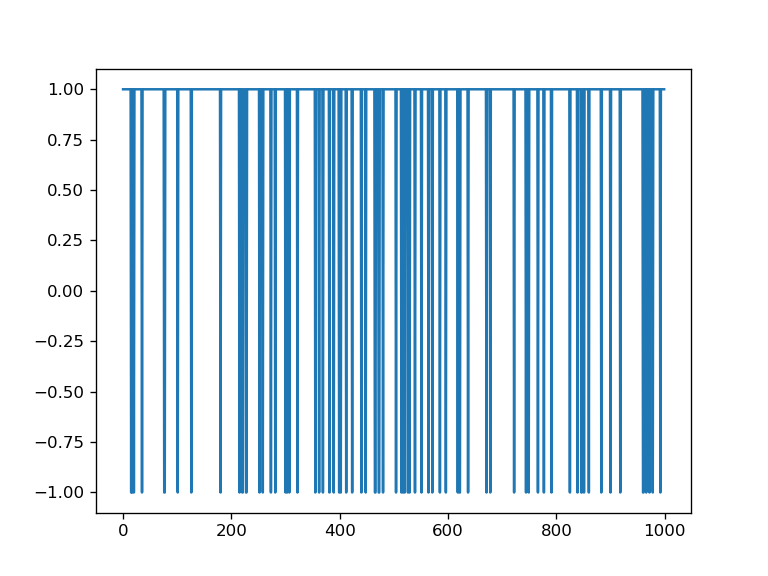

In [181]:
plt.figure(2)
plt.plot(y_pred2)

In [142]:
print(x.shape)

(1000, 2)


<IPython.core.display.Javascript object>


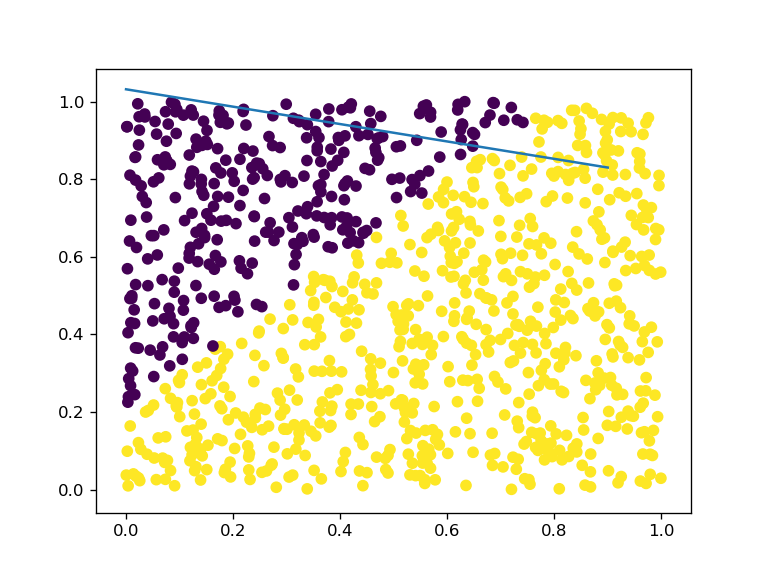

In [182]:
plt.figure(5)
plt.scatter(x[:,0],x[:,1],c = y)
x_me = np.arange(0,1,0.1)
#print()
y_me = -1*(w[0]*x_me+b)/w[1]
plt.plot(x_me,y_me)

plt.show()

In [ ]:
for i in range(y_pred2.shape[0]):
    plt.plot

In [149]:
print(w)

[-5.37458588e+10 -2.39922002e+11]


In [183]:
print(b)

247533176862.05176
